# Ejercicio 1

In [3]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
import pandas as pd
from func import *

Importo los datos y creo los grafos:

In [4]:
Y2H=ldata('TC01_data/yeast_Y2H.txt')
LIT=ldata('TC01_data/yeast_LIT.txt')
APMS=ldata('TC01_data/yeast_AP-MS.txt')
G_Y2H=nx.Graph(); G_LIT=nx.Graph(); G_APMS=nx.Graph();
G_Y2H.add_edges_from(Y2H); G_LIT.add_edges_from(LIT); G_APMS.add_edges_from(APMS); 

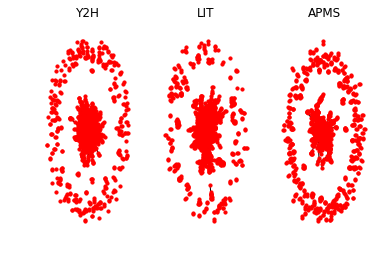

In [7]:
f, (ax1,ax2,ax3) = plt.subplots(1,3)

plt.sca(ax1)
nx.draw(G_Y2H, node_size=10)
ax1.set_title('Y2H')

plt.sca(ax2)
nx.draw(G_LIT, node_size=10)
ax2.set_title('LIT')

plt.sca(ax3)
nx.draw(G_APMS, node_size=10)
ax3.set_title('APMS')

f=plt.figure(1)
plt.show()

In [13]:
#%% Calculo valores de la tabla

redes=[G_Y2H,G_LIT,G_APMS]

nodes=[]; edges=[]; kmedio=[]; kmax=[]; kmin=[]; 
clust1=[]; clust2=[]; densidad=[]; diam=[];

pos=0
for red in redes:
    nodes.append(red.number_of_nodes())
    edges.append(red.number_of_edges())
    k=degrees2list(red)
    kmedio.append(np.mean(k))
    kmax.append(max(k))
    kmin.append(min(k))
    densidad.append(edges[pos]/(nodes[pos]*(nodes[pos]-1)/2))
    compgigante=max(nx.connected_component_subgraphs(red),key=len)
    diam.append(nx.diameter(compgigante))
    clust1.append(nx.average_clustering(red))
    clust2.append(nx.transitivity(red))
    pos+=1
    
esdirigida=[False]*3 #Interacción entre proteínas: no dirigido

In [17]:
caract=pd.DataFrame({   "Red":["Y2H","LIT","APMS"], 
                        "N":nodes,
                        "L":edges,
                        "Dirigida":esdirigida,
                        "<k>":kmedio,
                        "k máx":kmax,
                        "k mín":kmin,
                        "Densidad":densidad,
                        "Clust. <Ci>":clust1,
                        "Clust. global":clust2,
                        "Diametro":[np.inf]*3,
                        "Diam. comp. gigante":diam
                    })

caract=caract[['Red','N','L','Dirigida','<k>',
               'k máx','k mín','Densidad','Clust. <Ci>',
               'Clust. global','Diametro','Diam. comp. gigante']]

caract

,Red,N,L,Dirigida,<k>,k máx,k mín,Densidad,Clust. <Ci>,Clust. global,Diametro,Diam. comp. gigante
0,Y2H,2018,2930,False,2.903865,91,1,0.001440,0.046194,0.023614,inf,14
1,LIT,1536,2925,False,3.808594,40,1,0.002481,0.292492,0.346193,inf,19
2,APMS,1622,9070,False,11.183724,127,1,0.006899,0.554636,0.618590,inf,15


In [18]:
#%% Agrego algunos atributos relacionados a los componentes

for red in redes:
    red.graph["Componentes"]=list(nx.connected_component_subgraphs(red))
    compgigante=max(red.graph["Componentes"],key=len)
    red.graph["Componentes"].remove(compgigante)
    clust_comp=[]
    trans_comp=[]
    for comp in red.graph["Componentes"]:
        clust_comp.append(nx.average_clustering(comp))
        trans_comp.append(nx.transitivity(comp))
    red.graph["<Ci> de cada componente"]=clust_comp
    red.graph["Cglobal de cada componente"]=trans_comp
    red.graph["<Ci> CG"]=nx.average_clustering(compgigante)
    red.graph["Cglobal CG"]=nx.transitivity(compgigante)